In this task we will predict the percentage of students based on the study hours.
Its linear regression task and invloves just only two variables.

Imorting all neccerry labries to use in this task.

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset from report link
url= "http://bit.ly/w-data"
df= pd.read_csv(url)

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Basic Checks

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Our hours column is float64 dtype and Scores column is int64 datatype according to data information.

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Describe function shows count values of both variables. Mean is the sum of data divided by the number of data-points. It also shows standard deviation of variables, minimum value is 25% and maximum value is 75%.

In [8]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Zero null values in data. False shows zero null value.

EDA(Exploratory Data Analysis )

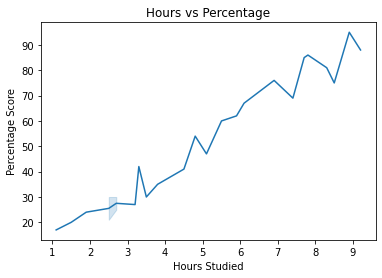

In [9]:
sns.lineplot(x='Hours', y='Scores',data=df)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

According to the graph it shows a positive linear regression. If students do study 9.25 hours a day, the score will be above 95.

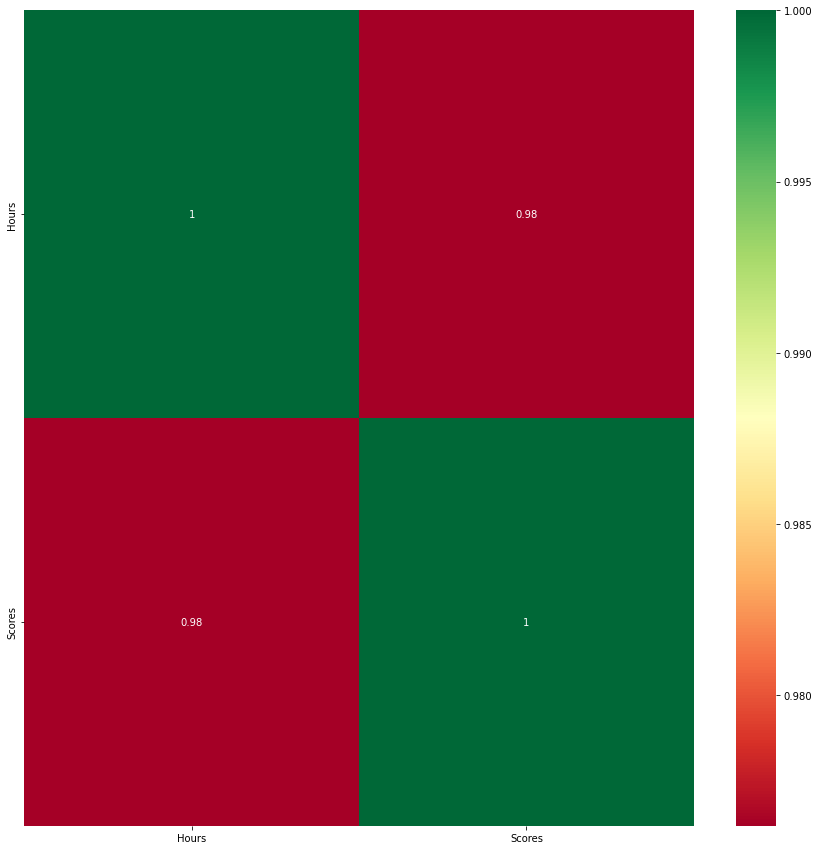

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

None of the variables are co-related.

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

We divided the data into "attributes" (inputs) and "labels" (outputs).

we have our attributes and labels.We are going to split our data through Scikit-Learn's built-in train_test_split()method.

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [14]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [15]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [16]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

Testing data - In Hours and predicting the score 

In [20]:
y_pred = lr.predict(X_test)

In [21]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing actual vs predicted value 

In [22]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


If a student studies for 9.25hrs/day 

In [23]:
hours=9.25
own_pred=lr.predict([[hours]])

In [24]:
own_pred

array([93.69173249])

In [25]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

4.183859899002975
